In [16]:
from sklearn.decomposition import PCA
import numpy as np
import torch
from einops import rearrange


In [20]:

# load_tensor
base_dir = "/home/youngju/ssd/ufosplat/paper_analysis/test"

volume_level0 = rearrange(torch.load(f'{base_dir}/latent_level0.pt'), 'b (d h w) c -> b d h w c', d=16, h=16, w=16) 
volume_level4 = rearrange(torch.load(f'{base_dir}/latent_level4.pt'), 'b (d h w) c -> b d h w c', d=16, h=16, w=16) 
volume_fine = rearrange(torch.load(f'{base_dir}/latent_fine.pt'), 'b c d h w -> b d h w c', d=32, h=32, w=32) 

print(volume_level0.shape)
print(volume_level4.shape)
print(volume_fine.shape)


# Assume volume_tensor has shape (b, d, h, w, c)
# Flatten spatial dimensions
b, d, h, w, c = volume_level0.shape
flat_volume = volume_level0.reshape(b, d * h * w, c)

# Perform PCA on each batch item
pca_results = []
for i in range(b):
    pca = PCA(n_components=3)  # Reduce to 3 principal components
    transformed = pca.fit_transform(flat_volume[i].numpy())
    # Reshape back to (d, h, w, 3)
    pca_results.append(transformed.reshape(d, h, w, 3))

pca_volumes = np.array(pca_results)  # Shape: (b, d, h, w, 3)
# convert values into color space
pca_volumes = (pca_volumes - pca_volumes.min()) / (pca_volumes.max() - pca_volumes.min()) * 255
# integer
pca_volumes_level0 = pca_volumes.astype(np.uint8)
print("min max values of pca volumes:", pca_volumes_level0.min(), pca_volumes_level0.max())
print("shape of pca volumes:", pca_volumes_level0.shape)

# Assume volume_tensor has shape (b, d, h, w, c)
# Flatten spatial dimensions
b, d, h, w, c = volume_level4.shape
flat_volume = volume_level4.reshape(b, d * h * w, c)

# Perform PCA on each batch item
pca_results = []
for i in range(b):
    pca = PCA(n_components=3)  # Reduce to 3 principal components
    transformed = pca.fit_transform(flat_volume[i].numpy())
    # Reshape back to (d, h, w, 3)
    pca_results.append(transformed.reshape(d, h, w, 3))

pca_volumes = np.array(pca_results)  # Shape: (b, d, h, w, 3)
# convert values into color space
pca_volumes = (pca_volumes - pca_volumes.min()) / (pca_volumes.max() - pca_volumes.min()) * 255
# integer
pca_volumes_level4 = pca_volumes.astype(np.uint8)
print("min max values of pca volumes:", pca_volumes_level4.min(), pca_volumes_level4.max())
print("shape of pca volumes:", pca_volumes_level4.shape)


torch.Size([1, 16, 16, 16, 128])
torch.Size([1, 16, 16, 16, 128])
torch.Size([1, 32, 32, 32, 128])
min max values of pca volumes: 0 255
shape of pca volumes: (1, 16, 16, 16, 3)
min max values of pca volumes: 0 255
shape of pca volumes: (1, 16, 16, 16, 3)


In [21]:
b, d, h, w, c = volume_fine.shape
flat_volume = volume_fine.reshape(b, d * h * w, c)

# Perform PCA on each batch item
pca_results = []
for i in range(b):
    pca = PCA(n_components=3)  # Reduce to 3 principal components
    transformed = pca.fit_transform(flat_volume[i].numpy())
    # Reshape back to (d, h, w, 3)
    pca_results.append(transformed.reshape(d, h, w, 3))

pca_volumes = np.array(pca_results)  # Shape: (b, d, h, w, 3)
# convert values into color space
pca_volumes = (pca_volumes - pca_volumes.min()) / (pca_volumes.max() - pca_volumes.min()) * 255
# integer
pca_volumes_fine = pca_volumes.astype(np.uint8)
print("min max values of pca volumes:", pca_volumes_fine.min(), pca_volumes_fine.max())
print("shape of pca volumes:", pca_volumes_fine.shape)

min max values of pca volumes: 0 255
shape of pca volumes: (1, 32, 32, 32, 3)


(16, 16, 16, 3)


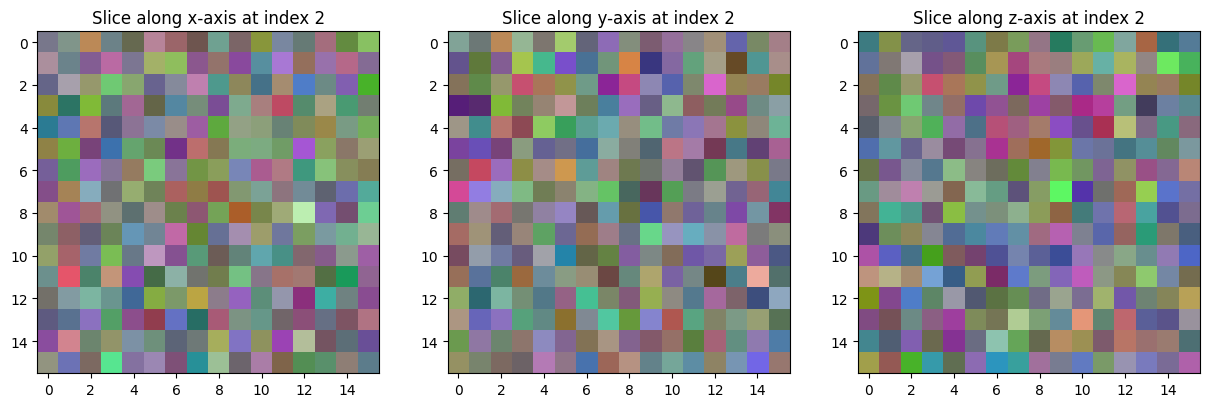

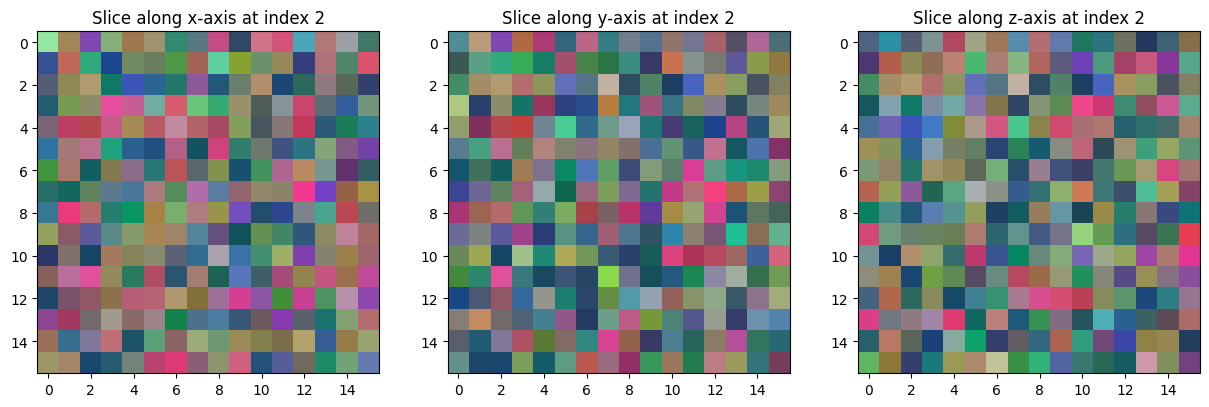

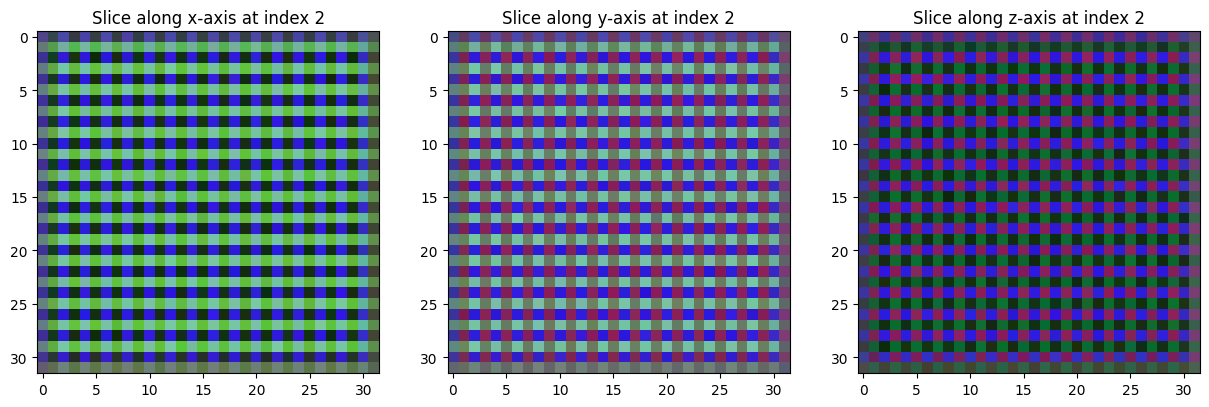

In [22]:
import matplotlib.pyplot as plt

# Visualize slices along each axis
def visualize_slices(volume, axis, slice_idx):
    if axis == 'x':
        slice_data = volume[:, :, slice_idx, :]
    elif axis == 'y':
        slice_data = volume[:, slice_idx, :, :]
    elif axis == 'z':
        slice_data = volume[slice_idx, :, :, :]
    
    plt.imshow(slice_data)
    plt.title(f'Slice along {axis}-axis at index {slice_idx}')
    plt.show()

# Visualize all three planes in one row
def visualize_all_planes(volume, slice_idx):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(volume[:, :, slice_idx, :])
    axes[0].set_title(f'Slice along x-axis at index {slice_idx}')
    axes[1].imshow(volume[:, slice_idx, :, :])
    axes[1].set_title(f'Slice along y-axis at index {slice_idx}')
    axes[2].imshow(volume[slice_idx, :, :, :])
    axes[2].set_title(f'Slice along z-axis at index {slice_idx}')
    plt.show()

# Visualize example slices (can change slice index)
# visualize_slices(pca_volumes[0], 'x', 10)  # Slice along x-axis
# visualize_slices(pca_volumes[0], 'y', 10)  # Slice along y-axis
# visualize_slices(pca_volumes[0], 'z', 10)  # Slice along z-axis

print(pca_volumes_level0[0].shape)
visualize_all_planes(pca_volumes_level0[0], 2)  # All three planes at index 0
visualize_all_planes(pca_volumes_level4[0], 2)  # All three planes at index 8
visualize_all_planes(pca_volumes_fine[0], 2)  # All three planes at index 8

In [51]:
# Perform PCA on each batch and view item
volume_2d_feat = torch.load('2d_feature.pt')
b, v, c, h, w = volume_2d_feat.shape
flat_2d_feat = volume_2d_feat.reshape(b, v, c, h * w)

pca_results_2d = []
for i in range(b):
    view_pca_results = []
    for j in range(v):
        pca = PCA(n_components=3)  # Reduce to 3 principal components
        transformed = pca.fit_transform(flat_2d_feat[i, j].numpy().T)  # Transpose to apply PCA across channels
        
        # Reshape back to (h, w, 3)
        view_pca_results.append(transformed.reshape(h, w, 3))
    pca_results_2d.append(view_pca_results)

pca_2d_volumes = np.array(pca_results_2d)  # Shape: (b, v, h, w, 3)

In [52]:
pca_2d_volumes.shape

(1, 3, 56, 56, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


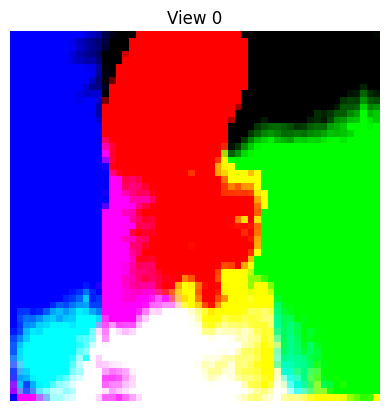

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


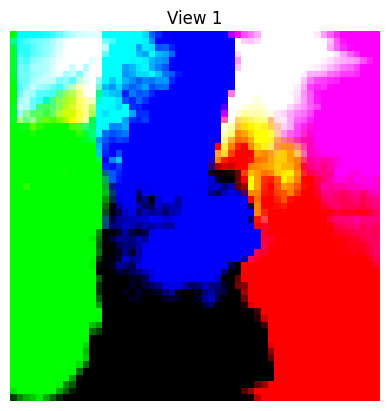

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


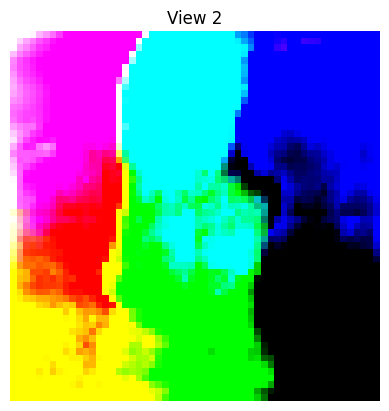

In [53]:
# Visualize PCA for specific view and slice
def visualize_2d_feat_pca(pca_volume, view_idx, cmap='viridis'):
    plt.imshow(pca_volume[view_idx], cmap=cmap)
    plt.title(f'View {view_idx}')
    plt.axis('off')
    plt.show()

# Example visualization of different views in batch 0
batch_idx = 0  # Select the batch to visualize
for view_idx in range(v):
    visualize_2d_feat_pca(pca_2d_volumes[batch_idx], view_idx)